In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
from scipy import stats
import time
from matplotlib.colors import LogNorm
from numpy.random import randn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import os
import process_abalone_utility as pau

/data/abalone/ABALONE_RampingUp/2021_08_11_T0829_ABALONE_10kV_SiPM2_32V_LED400V.dat Number of events 595356.0
Total events number: 595356
event n. 0 time to process: 0.02
event n. 100000 time to process: 12.04
event n. 200000 time to process: 24.10
event n. 300000 time to process: 36.34
event n. 400000 time to process: 48.60
event n. 500000 time to process: 60.87


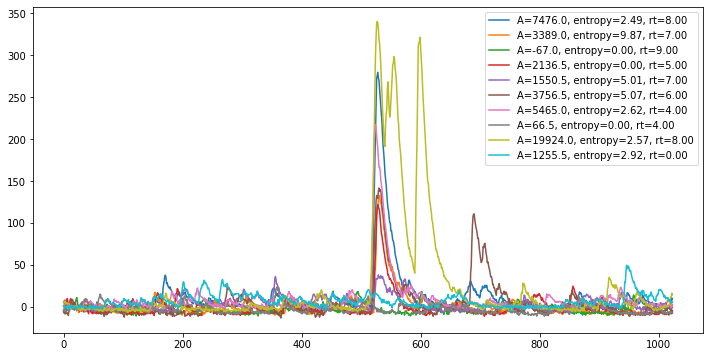

In [2]:
file_LED = '/data/abalone/ABALONE_RampingUp/2021_08_11_T0829_ABALONE_10kV_SiPM2_32V_LED400V.dat'
avolt = 10
dataLED = pau.process_abalone_data(filename=file_LED,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='4')

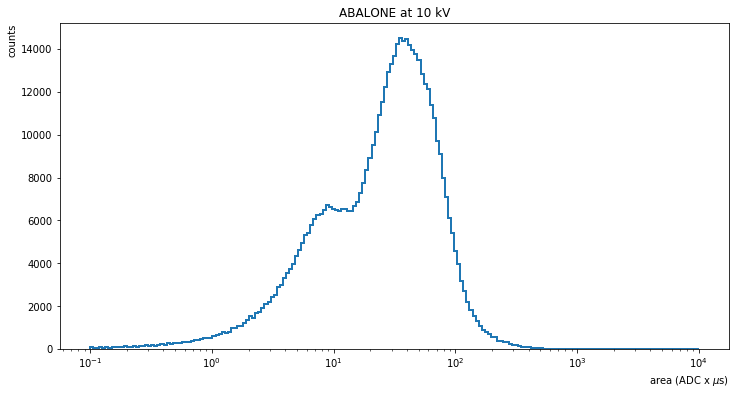

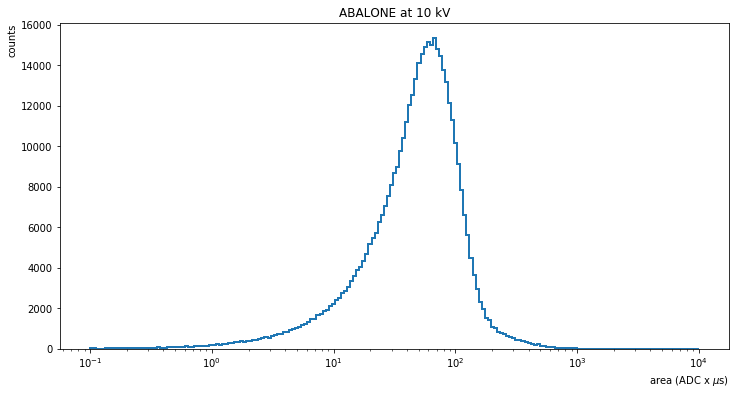

<Figure size 864x432 with 0 Axes>

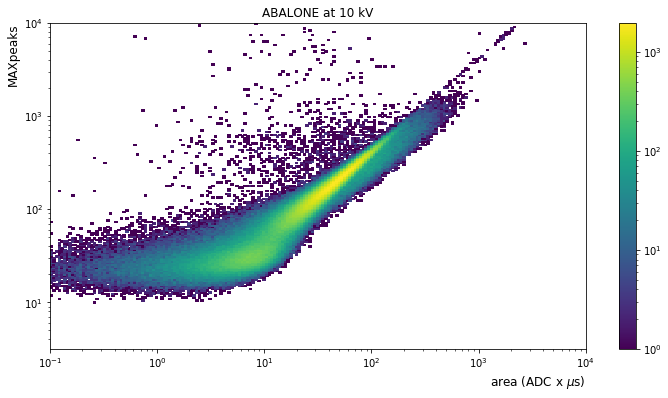

<Figure size 864x432 with 0 Axes>

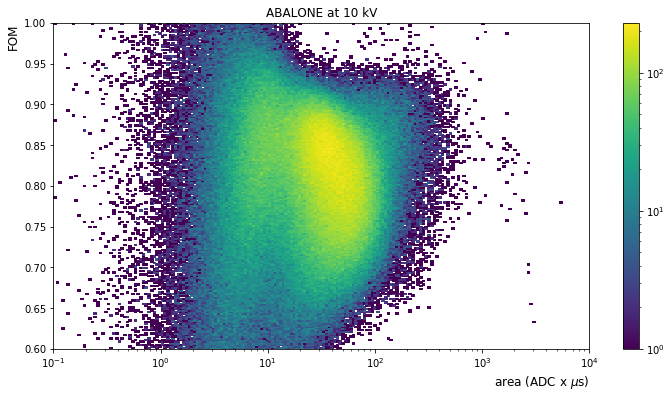

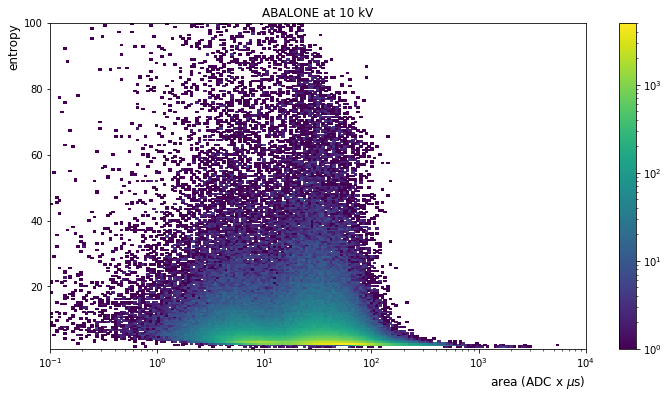

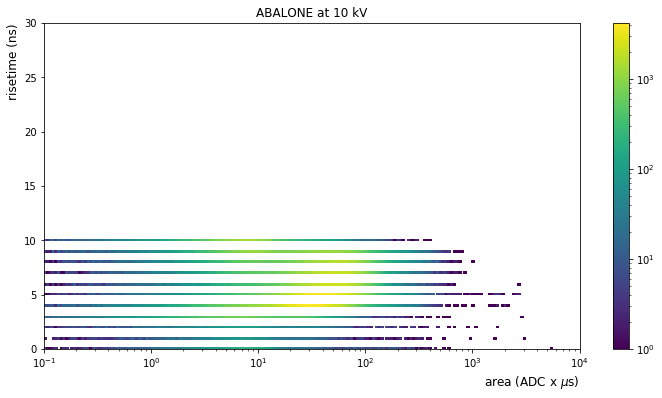

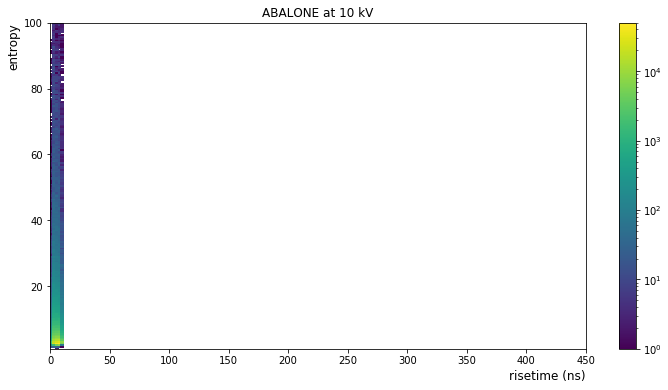

In [3]:
pau.plot_data(data=dataLED,fvolt=avolt,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_11_T0829_ABALONE_10kV_SiPM2_32V_LED400V.dat Number of events 595356.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 32858 waveform samples 1024
Events rejected by areadown 32858 -> 5.519050786420226 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 61 waveform samples 1024
Events rejected by risetime 61 -> 0.010245970478167684 %

n. events 172521 waveform samples 1024
Events rejected by max position 172521 -> 28.977788079737167 %

n. events 338768 waveform samples 1024


/usr/share/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->floating,key->block2_values] [items->['area_filt', 'width']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


Events selected  338768 -> 56.90175290078541 %


<Figure size 864x432 with 0 Axes>

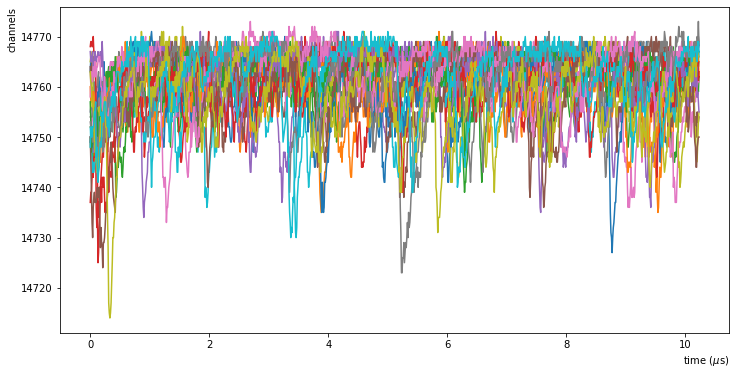

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

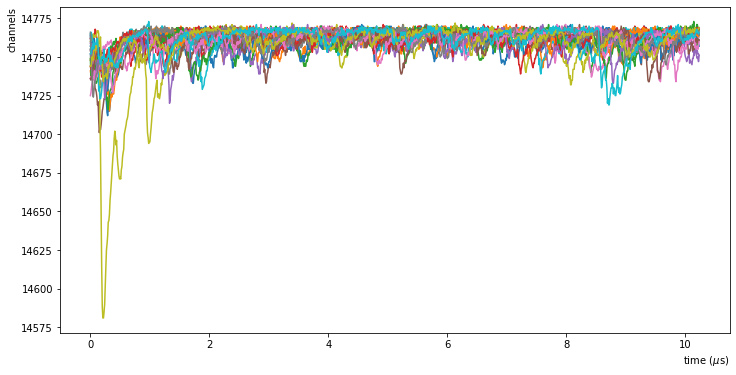

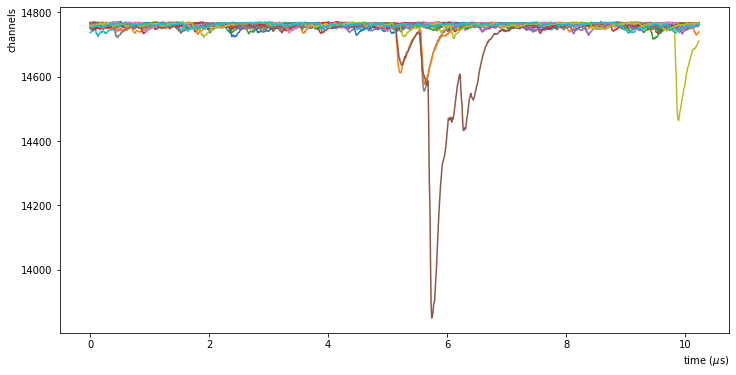

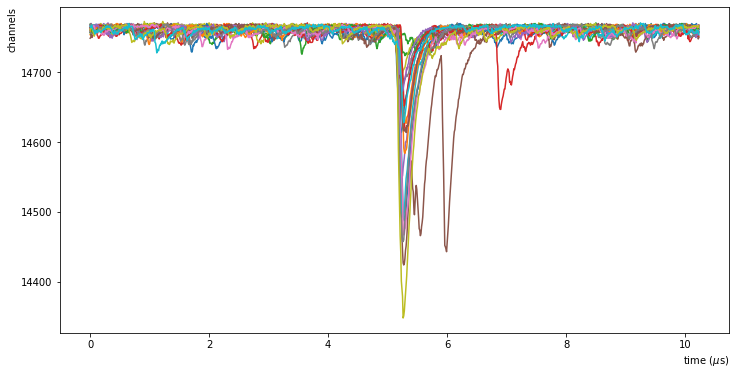

In [4]:
new_data, new_wf = pau.select_data(dataLED,filename=file_LED,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='4')

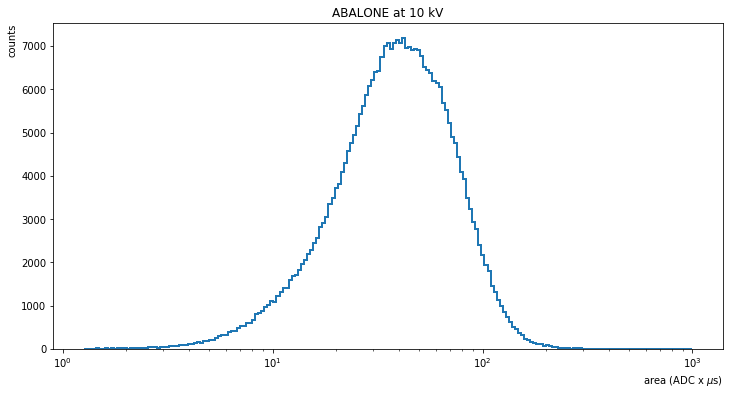

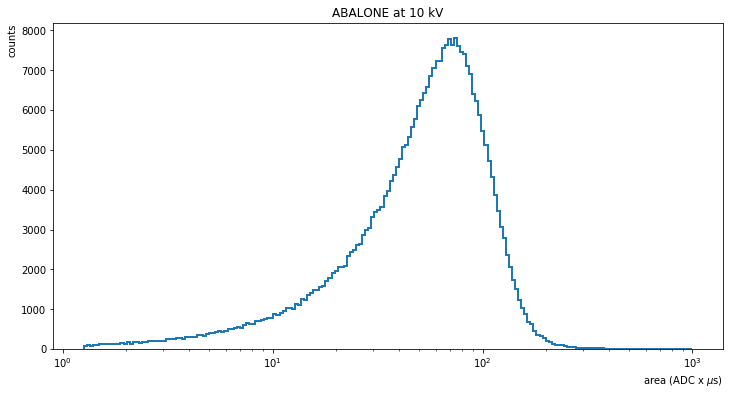

<Figure size 864x432 with 0 Axes>

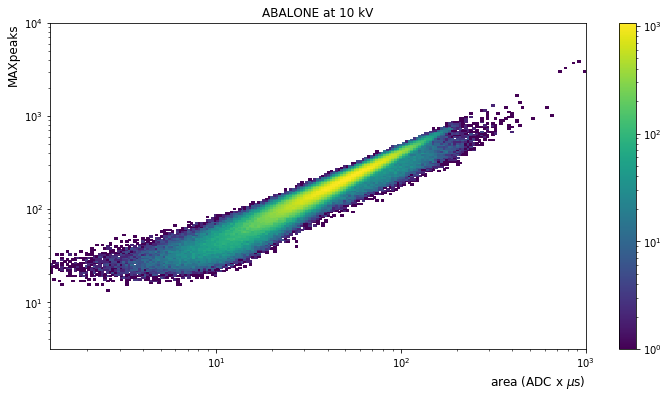

<Figure size 864x432 with 0 Axes>

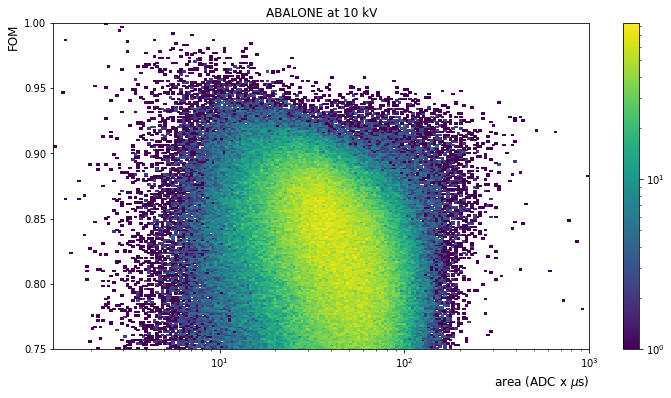

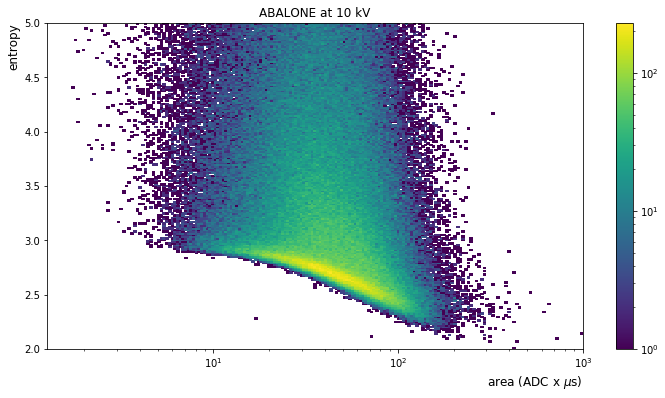

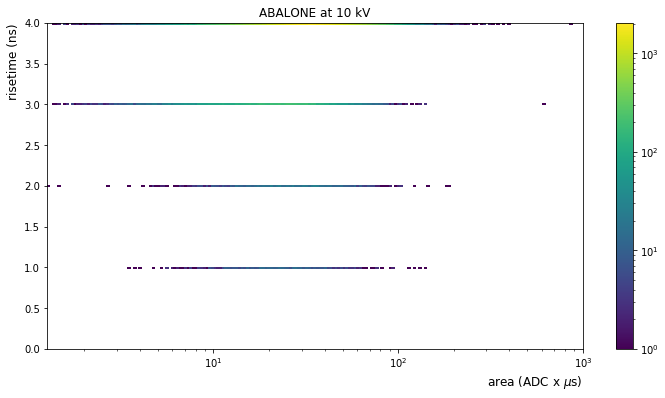

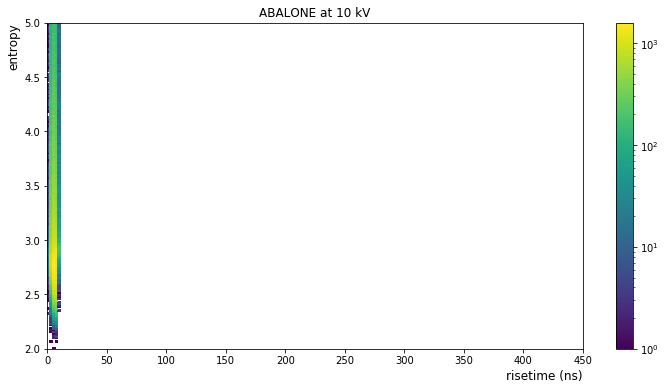

In [5]:
pau.plot_data(data=new_data,fvolt=avolt,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 44198 waveform samples 1024


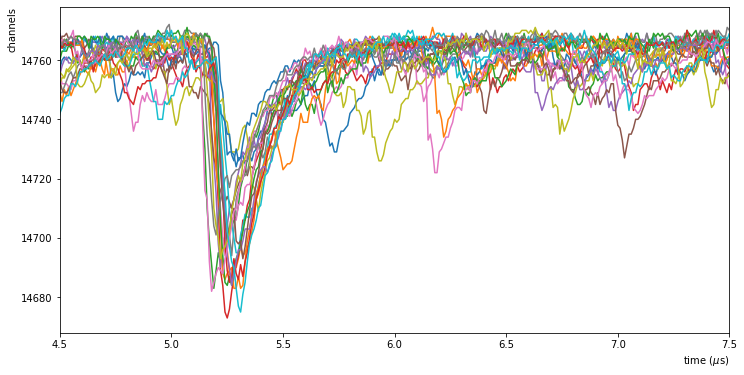

In [6]:
wf2 = new_wf[(new_data['area']>10)&(new_data['area']<20)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

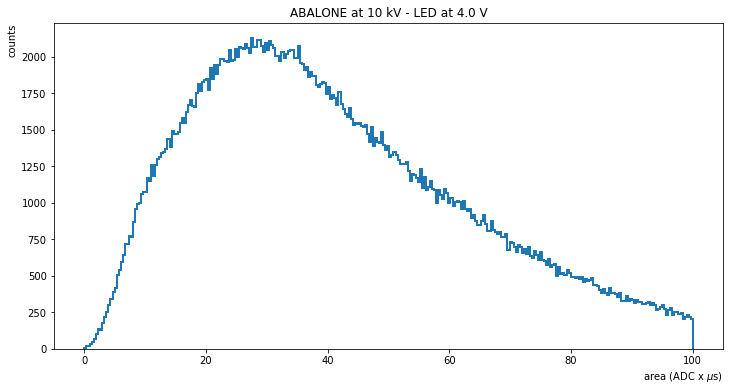

In [7]:
pau.plot_pe_spectrum(new_data['area'], volts=avolt, low=0, high=100, bins=300, ledv=4)

In [ ]:
peakint = pau.calculate_integrals( new_wf, nn=0, volts=avolt, sipmv = 32, ledv = '4', plot = 0, save = 1 )

In [ ]:
pau.plot_pe_spectrum(peakint, volts=avolt, low=0, high=100, bins=300, ledv=4)

/data/abalone/ABALONE_RampingUp/2021_08_11_T0842_ABALONE_10kV_SiPM2_32V_LED500V.dat Number of events 595584.0
Total events number: 595584
event n. 0 time to process: 0.00
event n. 100000 time to process: 13.56
event n. 200000 time to process: 27.12
event n. 300000 time to process: 40.70
event n. 400000 time to process: 54.25
event n. 500000 time to process: 67.83


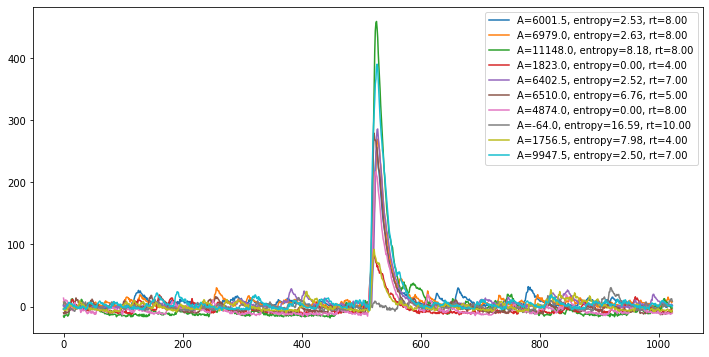

In [8]:
file_LED2 = '/data/abalone/ABALONE_RampingUp/2021_08_11_T0842_ABALONE_10kV_SiPM2_32V_LED500V.dat'
dataLED2 = pau.process_abalone_data(filename=file_LED2,nn=0,nplot=10,volts=avolt,sipmv=32,ledv='4')

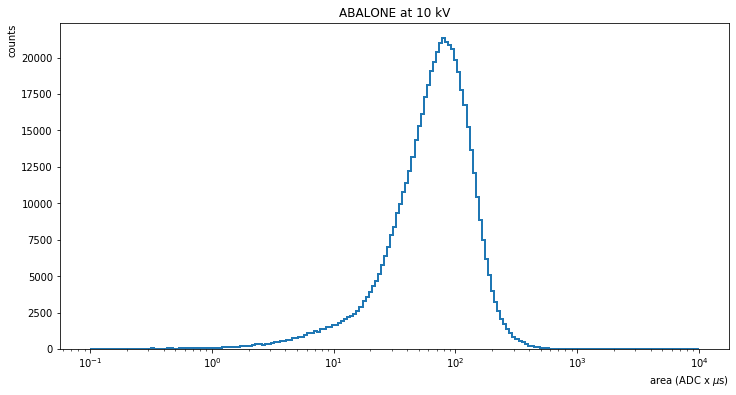

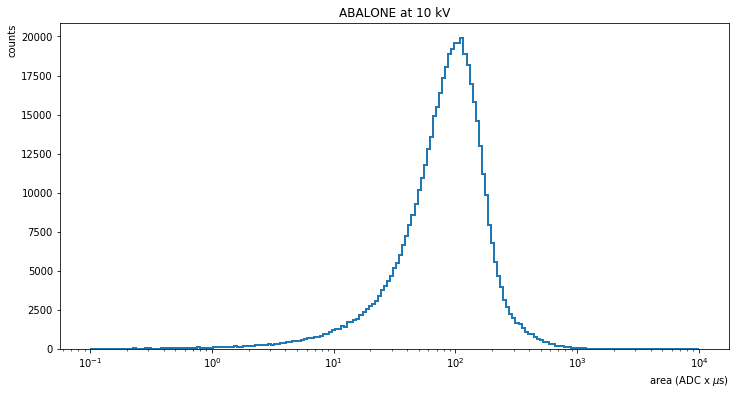

<Figure size 864x432 with 0 Axes>

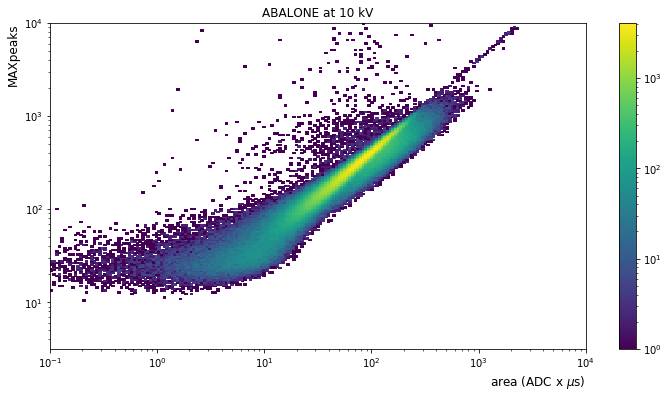

<Figure size 864x432 with 0 Axes>

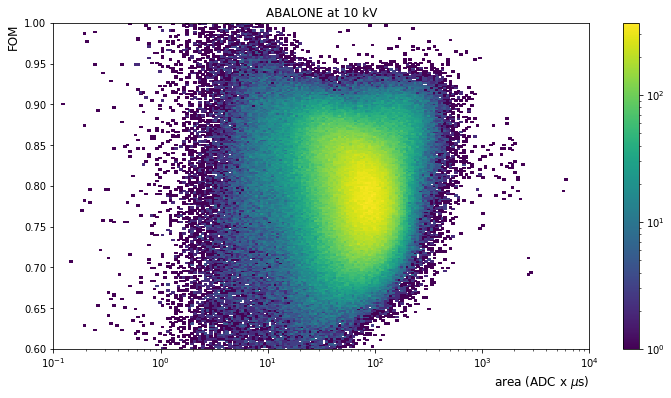

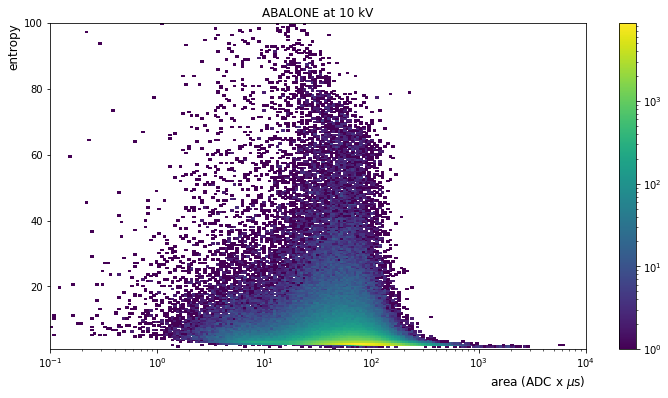

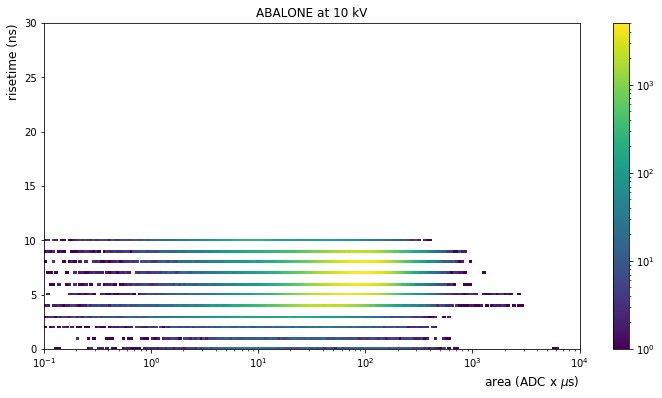

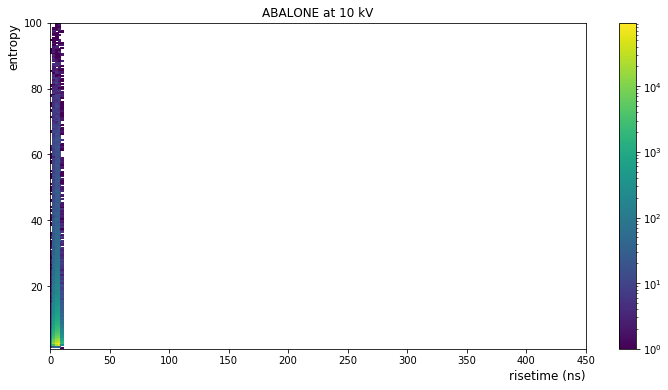

In [9]:
pau.plot_data(data=dataLED2,fvolt=avolt,low=-1, high=4,low_max=0.5,high_max=4,low_en=1, high_en=100,
              low_fom=0.6,high_fom=1,high_rt=30)

/data/abalone/ABALONE_RampingUp/2021_08_11_T0842_ABALONE_10kV_SiPM2_32V_LED500V.dat Number of events 595584.0
n. events 0 waveform samples 1024
Events rejected by areaup 0 -> 0.0 %

n. events 5362 waveform samples 1024
Events rejected by areadown 5362 -> 0.9002928218353751 %

n. events 0 waveform samples 1024
Events rejected by entropy 0 -> 0.0 %

n. events 0 waveform samples 1024
Events rejected by max 0 -> 0.0 %

n. events 7 waveform samples 1024
Events rejected by risetime 7 -> 0.001175316999785085 %

n. events 61833 waveform samples 1024
Events rejected by max position 61833 -> 10.381910863958737 %

n. events 478765 waveform samples 1024
Events selected  478765 -> 80.38580620030088 %


<Figure size 864x432 with 0 Axes>

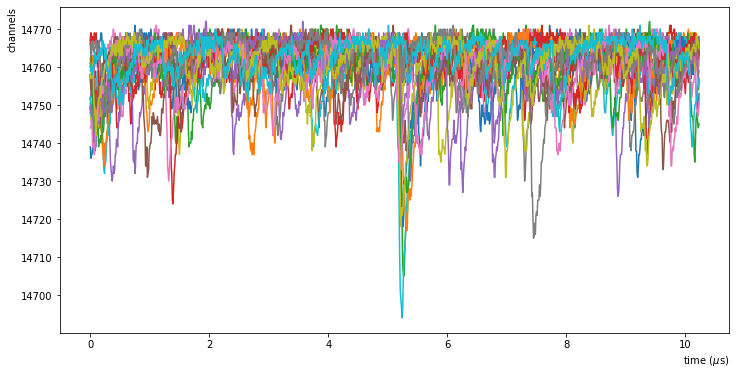

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

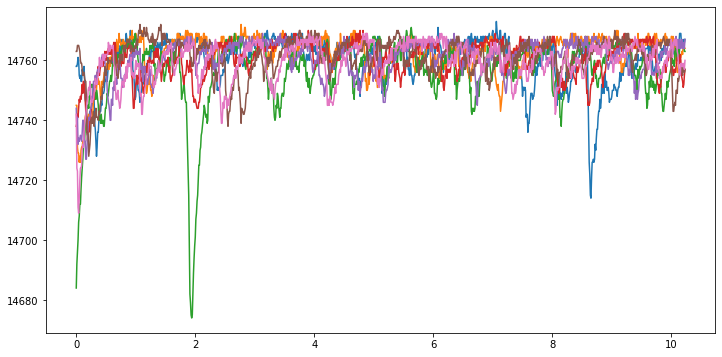

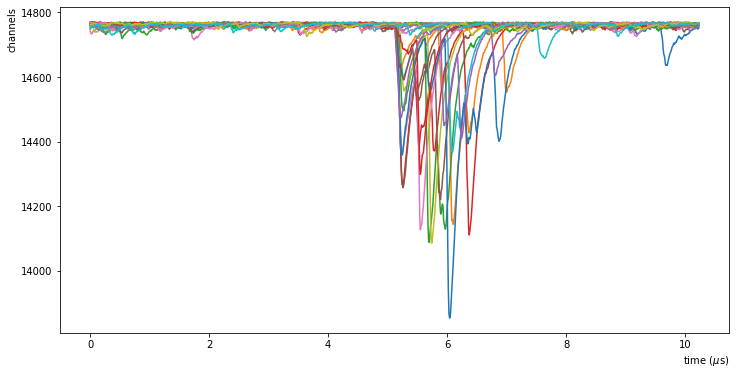

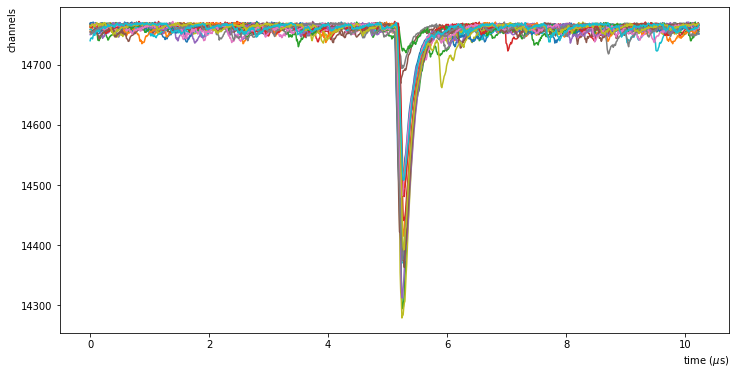

In [10]:
new_data2, new_wf2 = pau.select_data(dataLED2,filename=file_LED2,entr_cut=200,max_cut=1,area_cut=(0,1e7),
                                   pos_cut=(500,550),rt_cut=0,events=20, save=1,volts=avolt,sipmv=32,ledv='5')

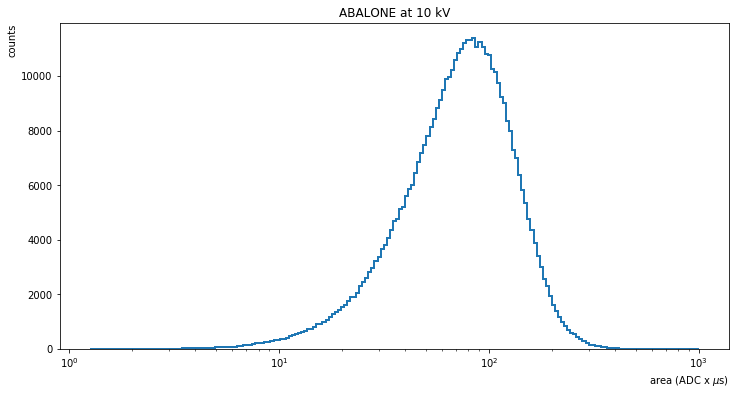

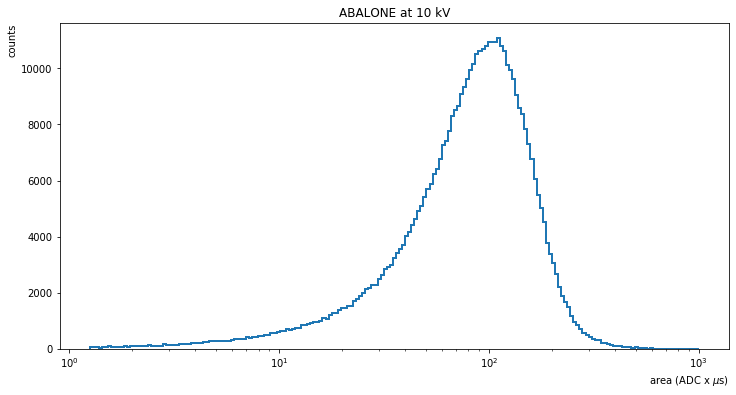

<Figure size 864x432 with 0 Axes>

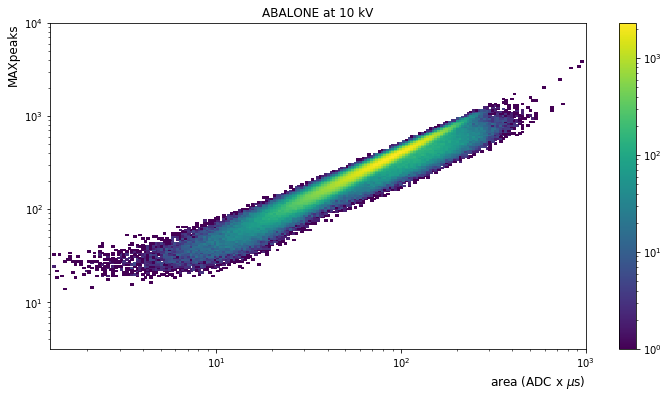

<Figure size 864x432 with 0 Axes>

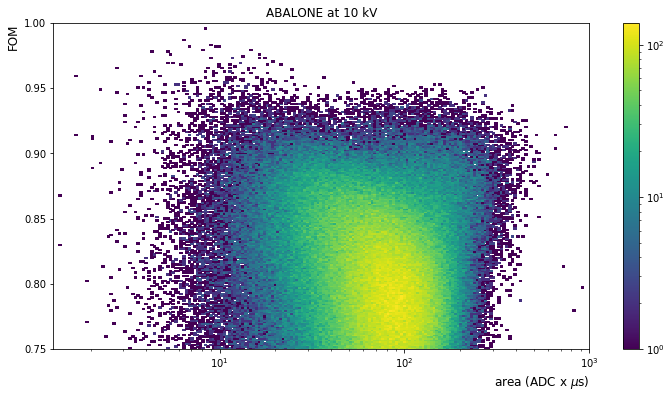

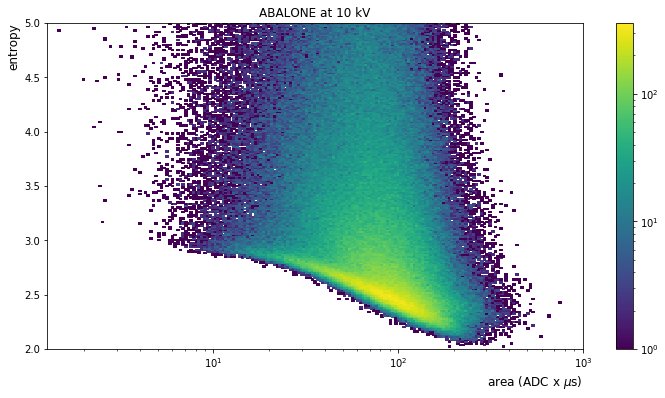

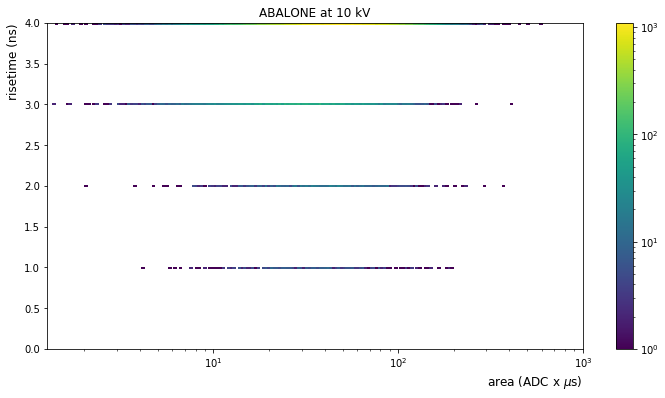

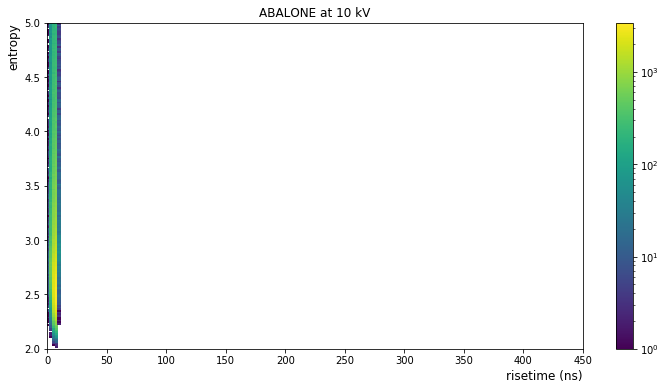

In [11]:
pau.plot_data(data=new_data2,fvolt=avolt,low=0.1, high=3,low_max=0.5,high_max=4,low_en=2, high_en=5,
          low_fom=0.75,high_fom=1)

n. events 16568 waveform samples 1024


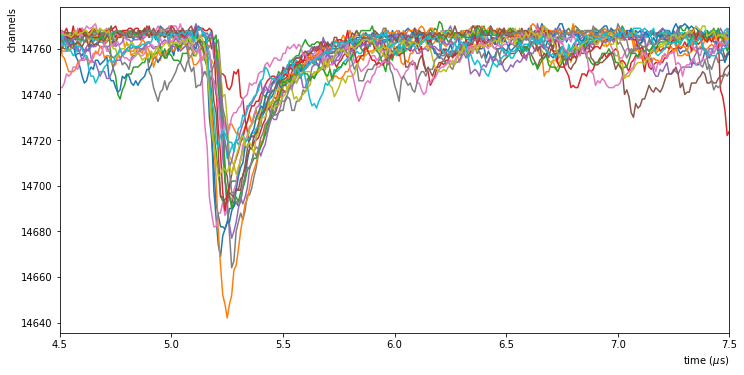

In [12]:
wf2 = new_wf2[(new_data2['area']>10)&(new_data2['area']<20)]
psu.plot_waveforms( wf2,events=20,tlim=(4.5,7.5))

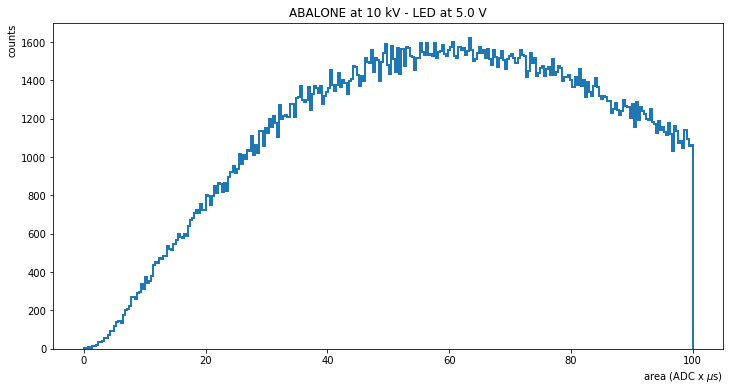

In [13]:
pau.plot_pe_spectrum(new_data2['area'], volts=avolt, low=0, high=100, bins=300, ledv=5)